In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

In [145]:
df=pd.read_csv('/Titanic-Dataset.csv')

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [148]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [149]:
import seaborn as sns

In [150]:
# classify on age , sex and class

In [151]:
def age_vs_survival(df , colname):
    plt.figure(figsize=(6,4))
    sns.kdeplot(df, x=colname, hue='Survived')
    plt.title(f'{colname} v/s survival')

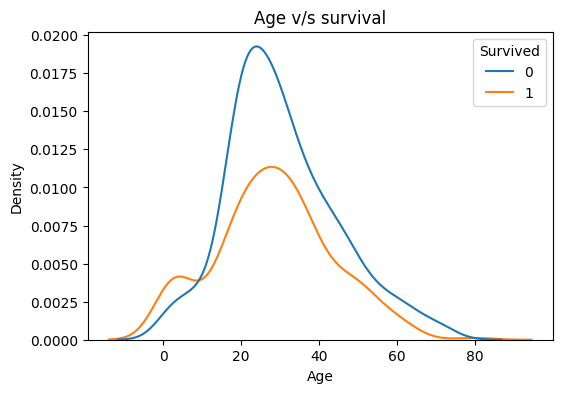

In [152]:
age_vs_survival(df, 'Age')

<Axes: ylabel='Frequency'>

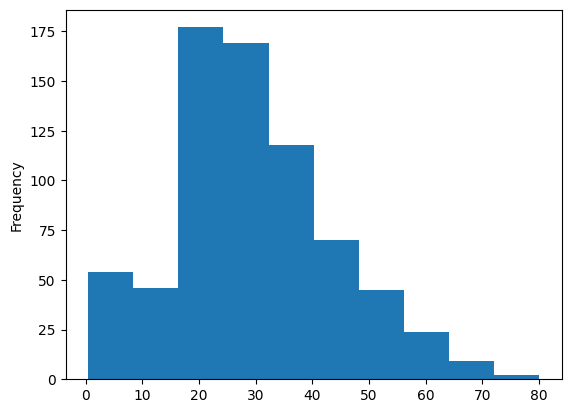

In [153]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

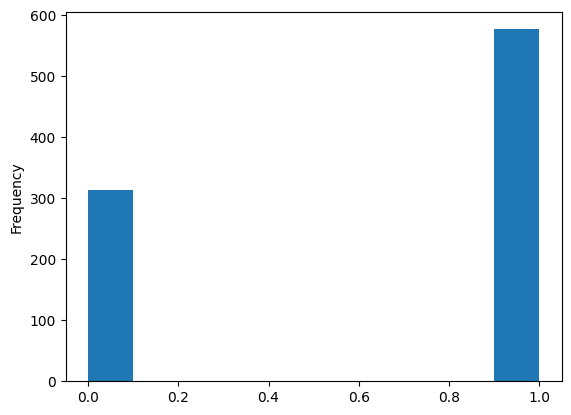

In [171]:
df['Sex'].plot.hist()

In [172]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [155]:
df['Sex']=le.fit_transform(df['Sex'])

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

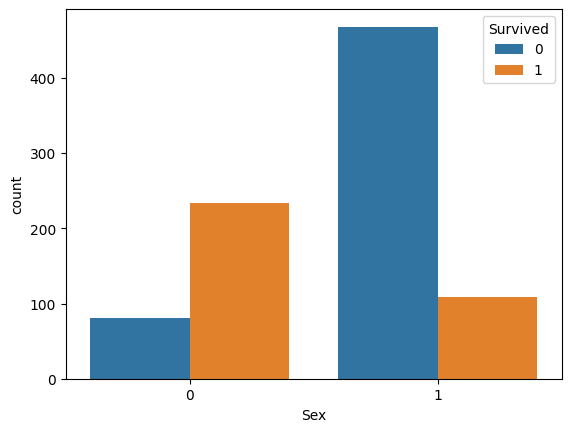

In [158]:
sns.countplot(x=df['Sex'],hue=df["Survived"])

<Axes: ylabel='Frequency'>

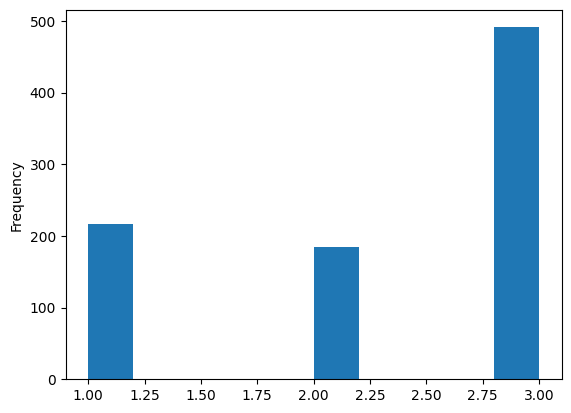

In [159]:
df['Pclass'].plot.hist()

<Axes: xlabel='Survived', ylabel='count'>

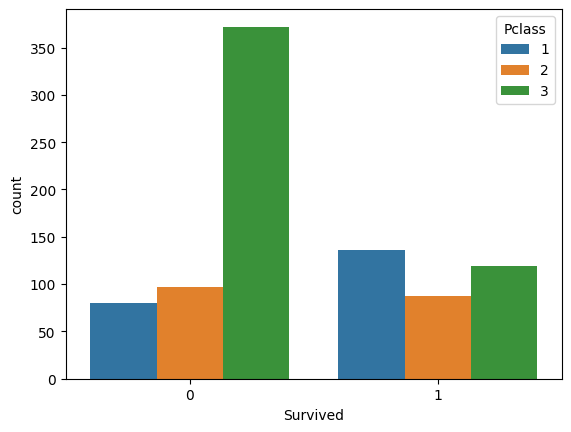

In [160]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])

In [161]:
x=df[['Pclass', 'Sex']]
y=df['Survived']

In [162]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
lr=LogisticRegression(random_state=0)

In [165]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [166]:
pred= print(lr.predict(x_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [167]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [170]:
warnings.filterwarnings("ignore")
result=lr.predict([[3,1]])
if result == 0:
  print("not survived")
else:
  print("survived")

not survived
